# **Multiclass Image Classification using CNN**

In this notebook I have shown how a simple CNN is implemented on a multiclass image classification problem. I have covered

1. How to create a 2 CNN Model and Train it.

2. How to evaluate the model on test set using different classification metrics.

3. How to visualize the images present in the training and test set.

**1. Import the Required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,  Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2

In [ ]:
!pip install gradio

**2. Load the Image Training and Validation Datasets**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2.1. Get the Image Dataset Path**

In [4]:
data_path = "/content/drive/MyDrive/Darwin Digitech/dataset"
train_data = "/content/drive/MyDrive/Darwin Digitech/dataset/train"
val_data = "/content/drive/MyDrive/Darwin Digitech/dataset/val"

**2.2. Load Image Datasets and Apply Augmentations**

Since the images present in the datasets are various in size, the image height and width are taken as 150, 150 respectively. The batch size value can be changed if required.

In [5]:
img_width = 180
img_height = 180
batch_size = 32

**Loading the training dataset and applying augmentations on it.**

In [6]:
train_gen = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 750 files belonging to 5 classes.


**Loading the validation dataset.**

In [7]:
val_gen = tf.keras.preprocessing.image_dataset_from_directory(
  val_data ,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 125 files belonging to 5 classes.


**3. Training a CNN Model**

Since the training dataset is ready let's create a different simple CNN Model to train on the image datasets

## **CNN Model A**

In [8]:
cnn_model_a=tf.keras.Sequential()
cnn_model_a.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(180,180,3)))
cnn_model_a.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn_model_a.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn_model_a.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn_model_a.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn_model_a.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn_model_a.add(tf.keras.layers.Flatten())
cnn_model_a.add(tf.keras.layers.Dense(5,activation='softmax'))

In [9]:
cnn_model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 90, 90, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 45, 45, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

In [10]:
cnn_model_a.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [11]:
history_cnn_model_a = cnn_model_a.fit(train_gen,epochs=15,validation_data=val_gen)

Epoch 1/15
24/24 [==============================] - 344s 9s/step - loss: 7.6763 - accuracy: 0.2240 - val_loss: 4.4052 - val_accuracy: 0.1600
Epoch 2/15
24/24 [==============================] - 1s 47ms/step - loss: 2.3343 - accuracy: 0.3413 - val_loss: 2.3522 - val_accuracy: 0.1520
Epoch 3/15
24/24 [==============================] - 1s 49ms/step - loss: 1.5996 - accuracy: 0.3827 - val_loss: 2.2824 - val_accuracy: 0.2080
Epoch 4/15
24/24 [==============================] - 1s 47ms/step - loss: 1.3747 - accuracy: 0.4453 - val_loss: 2.2522 - val_accuracy: 0.2960
Epoch 5/15
24/24 [==============================] - 1s 47ms/step - loss: 1.2082 - accuracy: 0.5173 - val_loss: 1.9954 - val_accuracy: 0.2640
Epoch 6/15
24/24 [==============================] - 1s 48ms/step - loss: 1.1618 - accuracy: 0.5400 - val_loss: 2.2598 - val_accuracy: 0.2880
Epoch 7/15
24/24 [==============================] - 1s 48ms/step - loss: 1.0003 - accuracy: 0.6173 - val_loss: 2.2702 - val_accuracy: 0.3280
Epoch 8/15
24

**3.1.A. Plotting the Model A Metrics**

In [12]:
train_accuracy = history_cnn_model_a.history['accuracy']
val_accuracy = history_cnn_model_a.history['val_accuracy']

train_loss = history_cnn_model_a.history['loss']
val_loss = history_cnn_model_a.history['val_loss']



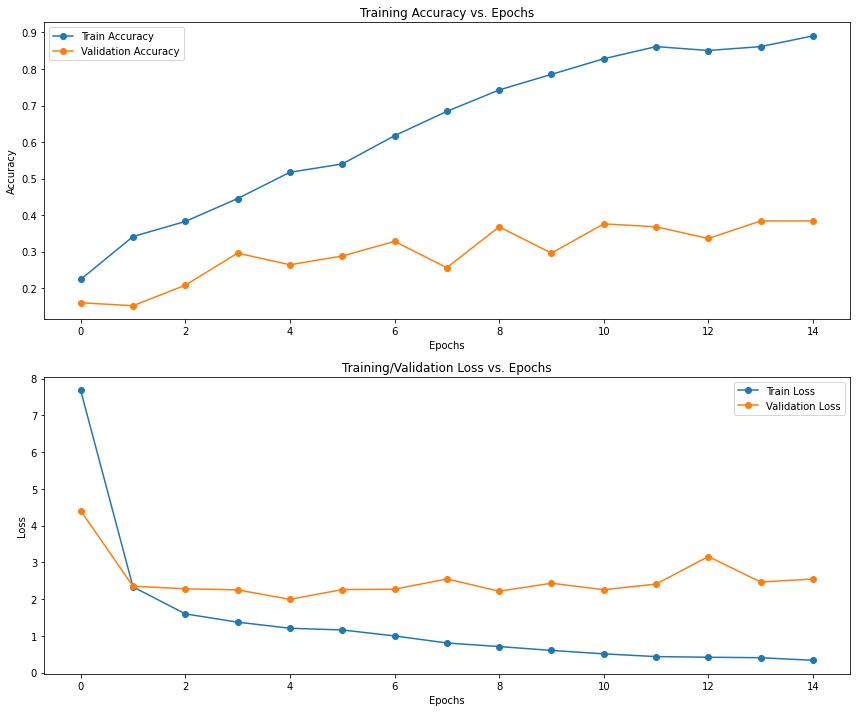

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')



plt.tight_layout()
plt.show()

**3.2.A. Testing the Model on Test Set**

In [14]:
test_dataset = '/content/drive/MyDrive/Darwin Digitech/dataset/test'

In [15]:
test_gen = tf.keras.preprocessing.image_dataset_from_directory(
  test_dataset,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 125 files belonging to 5 classes.


In [16]:
test_loss, test_accuracy = cnn_model_a.evaluate(test_gen, batch_size=batch_size)

4/4 [==============================] - 54s 13ms/step - loss: 3.9921 - accuracy: 0.2640


In [17]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy*100}")

Test Loss:     3.992110252380371
Test Accuracy: 26.399999856948853


In [18]:
predictions = cnn_model_a.predict(test_gen)

In [19]:
class_names = train_gen.class_names
print(class_names)

['boat_pose', 'cow_pose', 'downward_facing_dog_pose', 'plank_pose', 'tree_pose']


**3.3.A. Test Model  A Predictions On Gradio GUI** 

In [20]:
def predict_image(img):
  img_5d=img.reshape(-1,180,180,3)
  prediction=cnn_model_a.predict(img_5d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [21]:
import gradio as gr

image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

## **CNN Model B**

In [22]:
num_classes = 5

cnn_model_b = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [23]:
cnn_model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [24]:
cnn_model_b.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [25]:
epochs=15
history_cnn_model_b = cnn_model_b.fit(
  train_gen,
  validation_data=val_gen,
  epochs=epochs
)

Epoch 1/15
24/24 [==============================] - 3s 68ms/step - loss: 1.6788 - accuracy: 0.2493 - val_loss: 1.7182 - val_accuracy: 0.2400
Epoch 2/15
24/24 [==============================] - 2s 51ms/step - loss: 1.1533 - accuracy: 0.5853 - val_loss: 1.5400 - val_accuracy: 0.4000
Epoch 3/15
24/24 [==============================] - 2s 50ms/step - loss: 0.6754 - accuracy: 0.7627 - val_loss: 1.3581 - val_accuracy: 0.5120
Epoch 4/15
24/24 [==============================] - 2s 52ms/step - loss: 0.4097 - accuracy: 0.8707 - val_loss: 1.6986 - val_accuracy: 0.5760
Epoch 5/15
24/24 [==============================] - 2s 52ms/step - loss: 0.2847 - accuracy: 0.9027 - val_loss: 2.0361 - val_accuracy: 0.5360
Epoch 6/15
24/24 [==============================] - 2s 50ms/step - loss: 0.1665 - accuracy: 0.9440 - val_loss: 1.7621 - val_accuracy: 0.5840
Epoch 7/15
24/24 [==============================] - 2s 52ms/step - loss: 0.1568 - accuracy: 0.9493 - val_loss: 2.3820 - val_accuracy: 0.6160
Epoch 8/15
24

**3.1.B. Plotting the Model A Metrics**

In [26]:
train_accuracy = history_cnn_model_b.history['accuracy']
val_accuracy = history_cnn_model_b.history['val_accuracy']

train_loss = history_cnn_model_b.history['loss']
val_loss = history_cnn_model_b.history['val_loss']


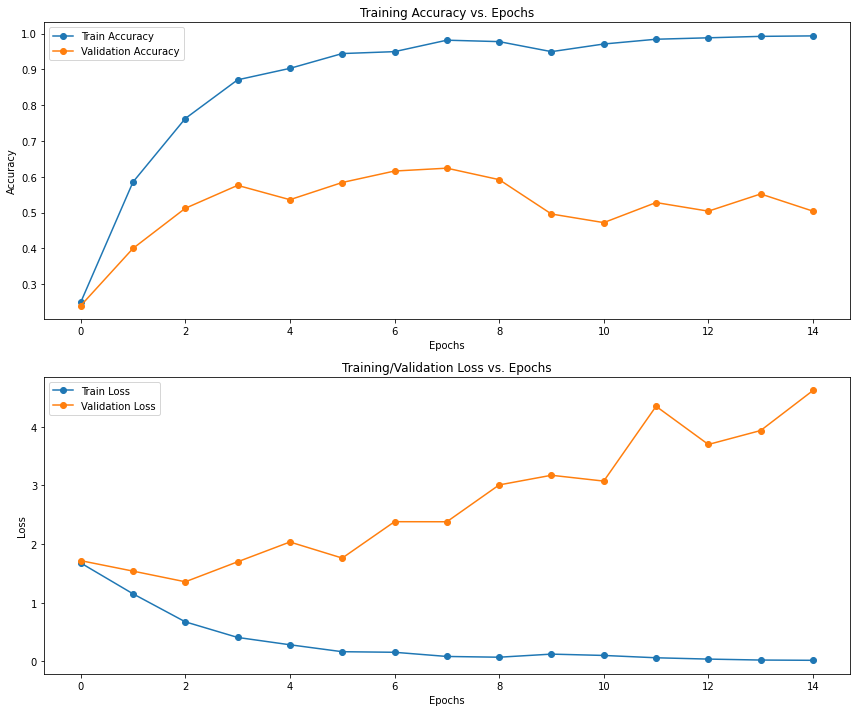

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')



plt.tight_layout()
plt.show()

**3.2.B. Testing the Model on Test Set**

In [28]:
test_loss, test_accuracy = cnn_model_b.evaluate(test_gen, batch_size=batch_size)

4/4 [==============================] - 0s 14ms/step - loss: 8.1513 - accuracy: 0.3520


In [29]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy*100}")

Test Loss:     8.151330947875977
Test Accuracy: 35.19999980926514


**3.3.B Test Model B Predictions On Gradio GUI** 

In [30]:
def predict_image(img):
  img_5d=img.reshape(-1,180,180,3)
  prediction=cnn_model_b.predict(img_5d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [31]:
import gradio as gr

image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')